# NutriSee: Food Detection using YOLOv8

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Dec  1 15:28:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5PS65ei69wWuZQH4xGwI")
project = rf.workspace("nutrisee-qsara").project("nutrisee-food-detection-4")
version = project.version(8)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to NutriSee-Food-Detection-4-8 in yolov8:: 100%|██████████| 8126/8126 [00:01<00:00, 5108.82it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 104MB/s] 
New https://pypi.org/project/ultralytics/8.3.39 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/NutriSee-Food-Detection-4-8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnos

/content


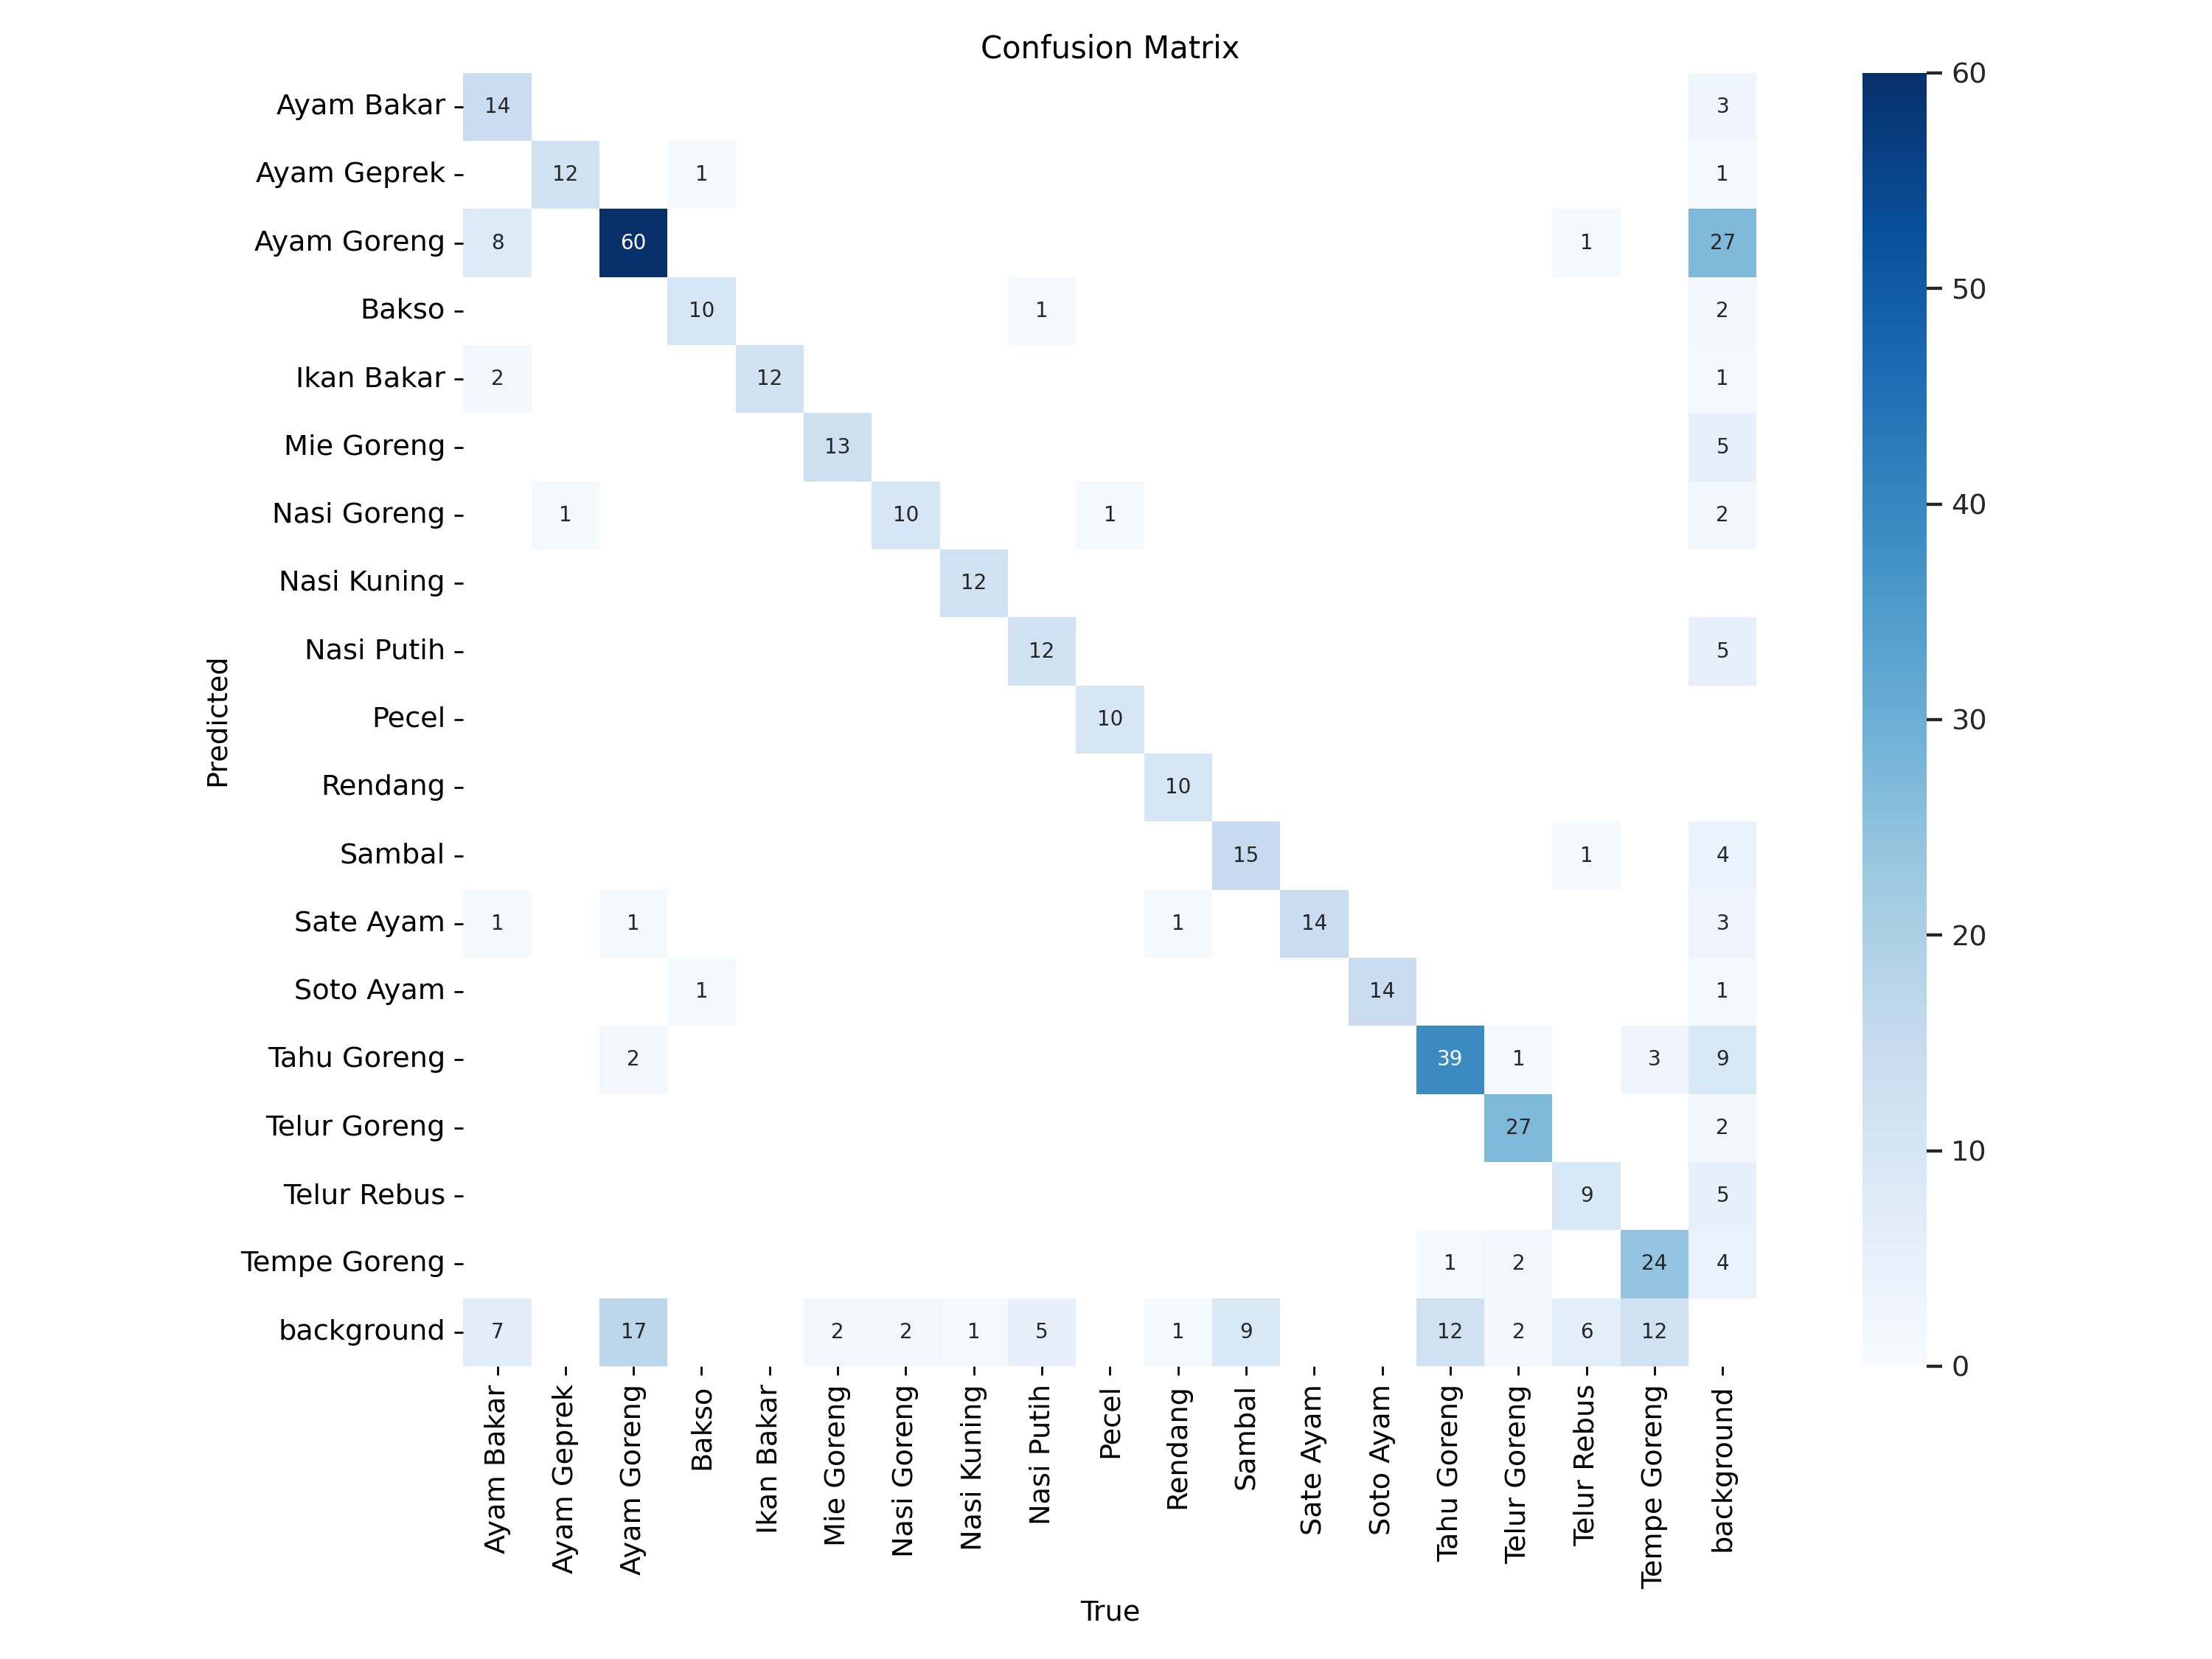

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


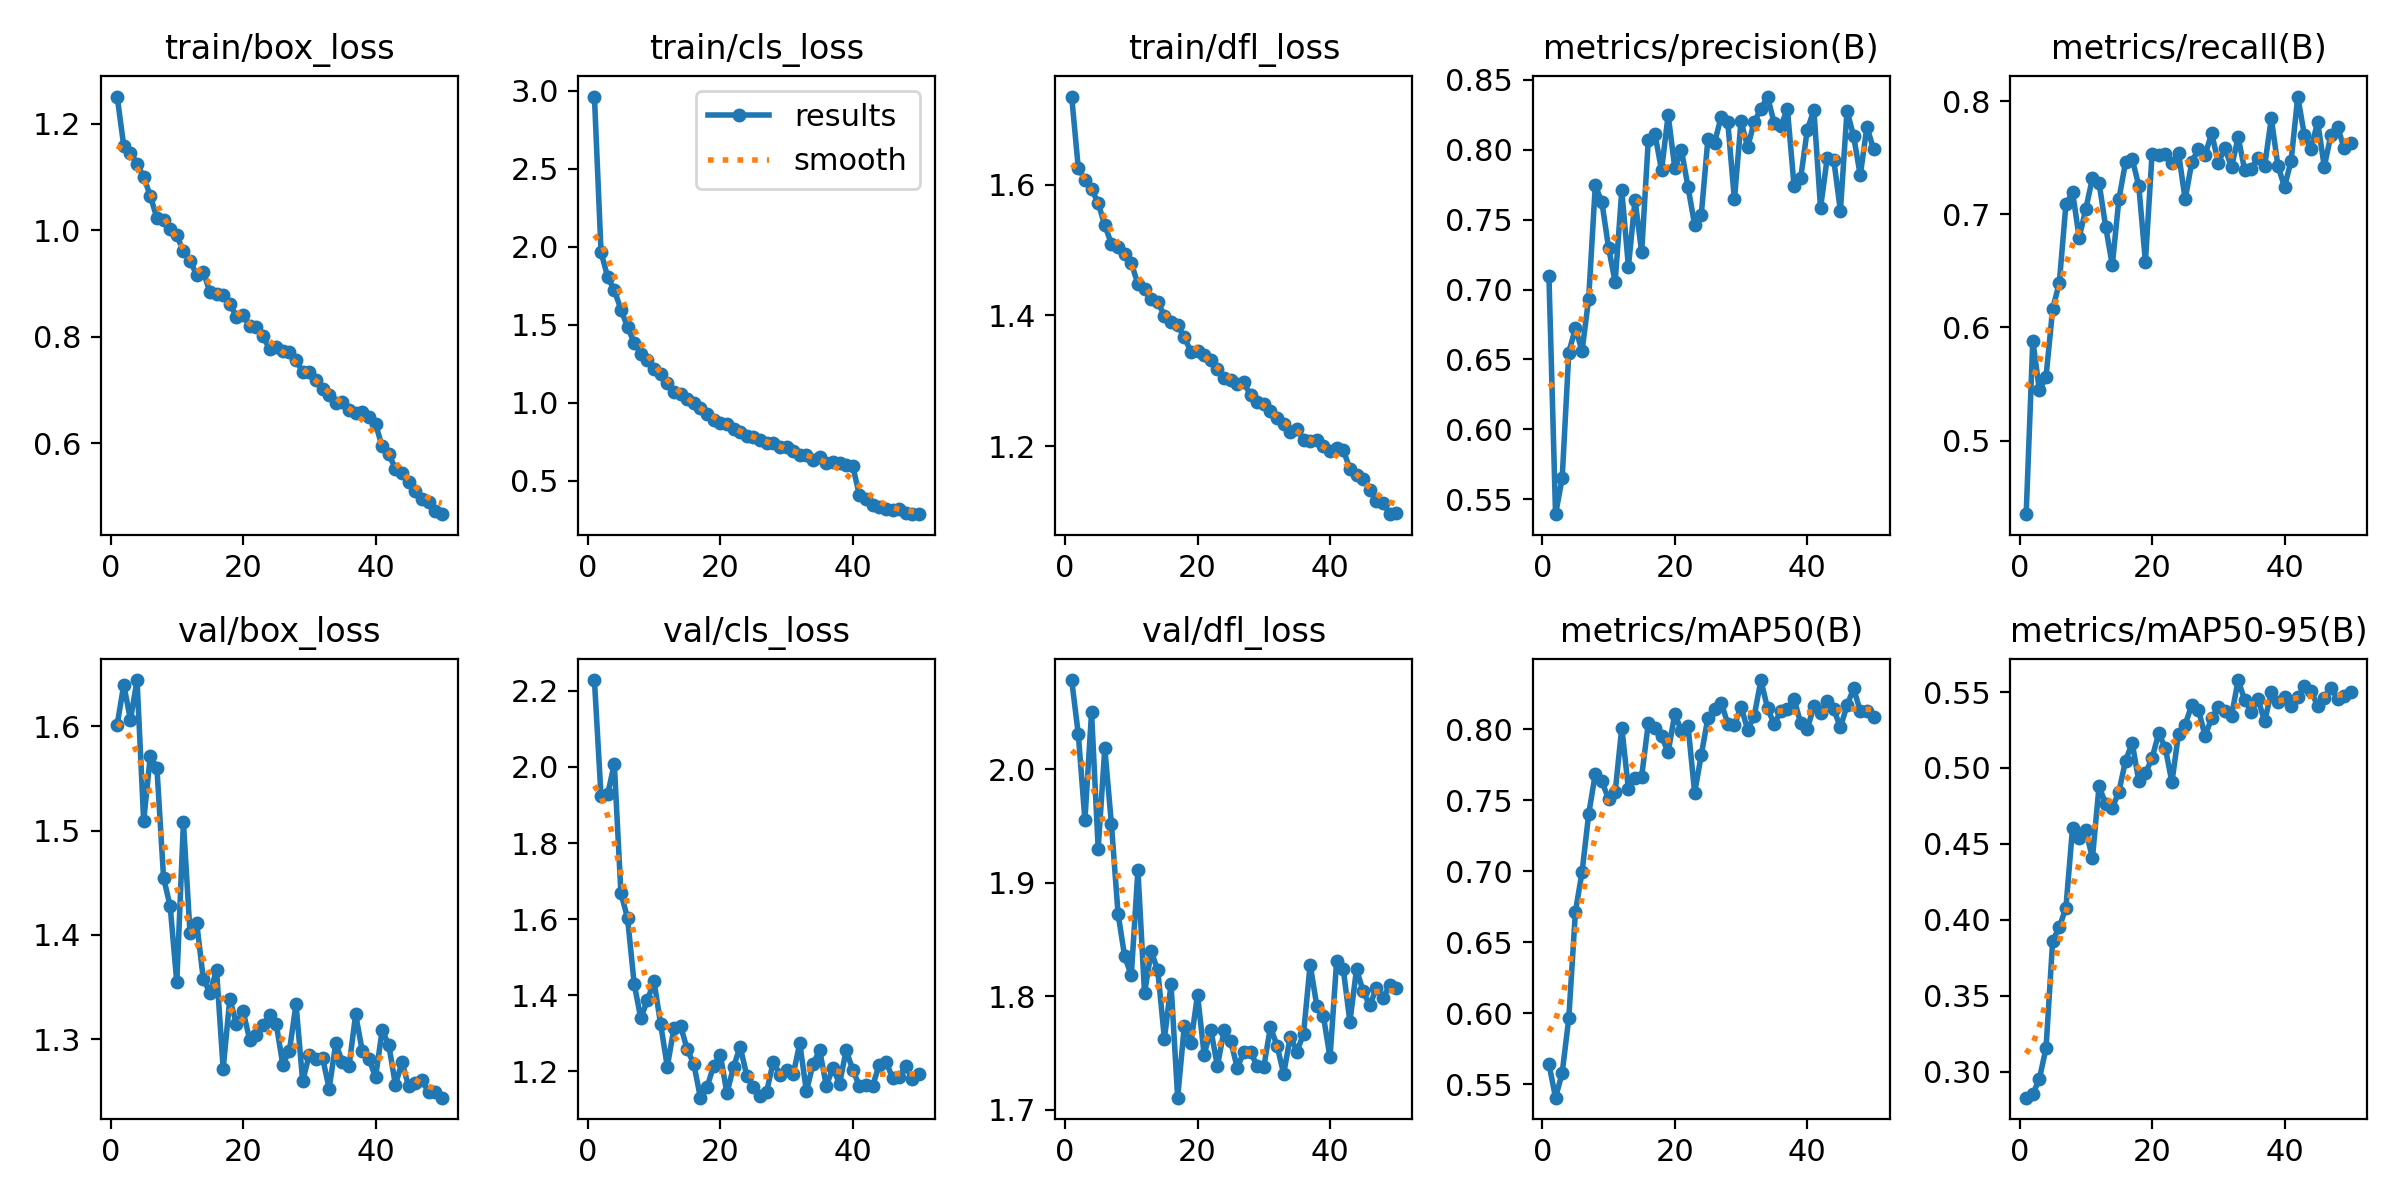

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
!unzip /content/runs.zip

Archive:  /content/runs.zip
   creating: detect/
   creating: detect/train/
   creating: detect/train/weights/
  inflating: detect/train/train_batch2.jpg  
  inflating: detect/train/train_batch9361.jpg  
  inflating: detect/train/val_batch2_labels.jpg  
  inflating: detect/train/labels.jpg  
  inflating: detect/train/val_batch0_pred.jpg  
  inflating: detect/train/train_batch0.jpg  
  inflating: detect/train/R_curve.png  
  inflating: detect/train/P_curve.png  
  inflating: detect/train/PR_curve.png  
  inflating: detect/train/val_batch1_labels.jpg  
  inflating: detect/train/events.out.tfevents.1732988580.c1e791dd55a4.263.0  
  inflating: detect/train/results.png  
  inflating: detect/train/val_batch0_labels.jpg  
  inflating: detect/train/labels_correlogram.jpg  
  inflating: detect/train/confusion_matrix_normalized.png  
  inflating: detect/train/train_batch9362.jpg  
  inflating: detect/train/results.csv  
  inflating: detect/train/train_batch9360.jpg  
  inflating: detect/train/va

## Inference

In [ ]:
!yolo detect predict model='/content/best.pt' source="/content/fd.jpg"

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11,132,550 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/fd.jpg: 640x480 1 Ayam Bakar, 2 Nasi Putihs, 1 Sambal, 295.8ms
Speed: 12.6ms preprocess, 295.8ms inference, 24.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict



image 1/1 /content/19.jpg: 640x384 1 Bakso, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


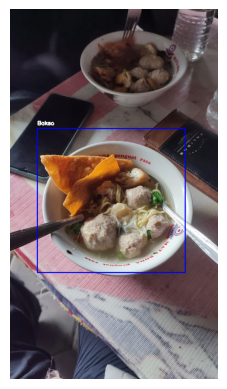

Detected foods with nutrition:
   class  Calories (kcal)  Protein (g)  Carbohydrates (g)  Fat (g)  Fiber (g)
3  Bakso              444        42.39               0.61    28.86        0.0


In [ ]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import os

# Load model YOLO
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# Path ke gambar untuk deteksi
image_path = '/content/19.jpg'

# Deteksi makanan di gambar
results = model(image_path)

# Load dataset nutrisi
nutrition_file = '/content/nutrition_data.csv'
nutrition_df = pd.read_csv(nutrition_file)

# Parsing hasil deteksi
detected_foods = []
detected_boxes = []
for result in results:
    for box in result.boxes.data.tolist():
        x1, y1, x2, y2, conf, cls = box
        label = result.names[int(cls)]
        detected_foods.append(label)
        detected_boxes.append([int(x1), int(y1), int(x2), int(y2)])

# Filter data nutrisi berdasarkan makanan yang terdeteksi
detected_nutrition = nutrition_df[nutrition_df['class'].isin(detected_foods)]

# Baca gambar untuk visualisasi
image = cv2.imread(image_path)

# Tambahkan bounding box dan hanya nama makanan
for food, box in zip(detected_foods, detected_boxes):
    x1, y1, x2, y2 = box

    # Tambahkan nama makanan saja
    text = f"{food}"

    # Gambar bounding box dan teks nama makanan di gambar
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Simpan gambar hasil
output_path = "/content/pc_hasil.jpg"
cv2.imwrite(output_path, image)

# Tampilkan gambar hasil
image_with_food_names = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_with_food_names)
plt.axis('off')
plt.show()

# Cetak informasi nutrisi di luar gambar
print("Detected foods with nutrition:")
print(detected_nutrition)


In [ ]:
!zip -r runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/fd.jpg (deflated 4%)
  adding: content/runs/detect/predict13/ (stored 0%)
  adding: content/runs/detect/predict13/images.jpeg (deflated 4%)
  adding: content/runs/detect/predict5/ (stored 0%)
  adding: content/runs/detect/predict5/xc.jpg (deflated 4%)
  adding: content/runs/detect/predict14/ (stored 0%)
  adding: content/runs/detect/predict14/prek.jpg (deflated 8%)
  adding: content/runs/detect/predict16/ (stored 0%)
  adding: content/runs/detect/predict16/baxx.jpg (deflated 10%)
  adding: content/runs/detect/predict15/ (stored 0%)
  adding: content/runs/detect/predict15/gor2.jpg (deflated 10%)
  adding: content/runs/detect/predict21/ (stored 0%)
  adding: content/runs/detect/predict21/pc.jpg (deflated 4%)
  adding: content/runs/detect/predict2/ (stored 0%)
  adding: content/runs/detect/predict2/nn.jpg (deflated 4%)
  ad

In [ ]:
from google.colab import files

# Mengunduh file ZIP
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Save to h5

In [ ]:
model_path = '/content/best.pt'
model = YOLO(model_path)

model.save('/content/yolov8s.h5')

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,132,550 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 22, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnxslim==0.1.34', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 175.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 192.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 152.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.3s, installed 2 packages: ['onnxslim==0.1.34', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: 

'/content/best.onnx'

In [ ]:
!pip install tensorflow-decision-forests==1.10.0

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/best.pt")  # load an official model

# Export the model
model.export(format="tfjs")

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,132,550 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 22, 8400) (21.5 MB)
requirements: Ultralytics requirement ['onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 253.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.1s, installed 1 package: ['onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.17.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 2.4s, saved as '/content/best.onnx' (42.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow 

'/content/best_web_model'

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
model.export(format='tflite')

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,132,550 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 22, 8400) (21.5 MB)

TensorFlow SavedModel: starting export with tensorflow 2.17.1...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 1.8s, saved as '/content/runs/detect/train/weights/best.onnx' (42.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 14.9s, saved as '/content/runs/detect/train/weights/best_saved_model' (107.0 MB)

TensorFlow Lite: starting export with tensorflow 2.17.1...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/runs/detect/train/weights/best_saved_model/best_float32.tflite' (42.7 MB)

Export complete (16.0s)
Results saved to /co

'/content/runs/detect/train/weights/best_saved_model/best_float32.tflite'

In [ ]:
!zip -r model_tfjs.zip /content/best_web_model

  adding: content/best_web_model/ (stored 0%)
  adding: content/best_web_model/group1-shard10of11.bin (deflated 7%)
  adding: content/best_web_model/group1-shard5of11.bin (deflated 7%)
  adding: content/best_web_model/model.json (deflated 94%)
  adding: content/best_web_model/group1-shard2of11.bin (deflated 7%)
  adding: content/best_web_model/group1-shard8of11.bin (deflated 7%)
  adding: content/best_web_model/group1-shard7of11.bin (deflated 7%)
  adding: content/best_web_model/group1-shard1of11.bin (deflated 11%)
  adding: content/best_web_model/group1-shard4of11.bin (deflated 7%)
  adding: content/best_web_model/group1-shard3of11.bin (deflated 7%)
  adding: content/best_web_model/group1-shard9of11.bin (deflated 7%)
  adding: content/best_web_model/group1-shard11of11.bin (deflated 7%)
  adding: content/best_web_model/metadata.yaml (deflated 41%)
  adding: content/best_web_model/group1-shard6of11.bin (deflated 7%)
